# LinkedIn Jobs Dataset — Exploratory Data Analysis

## Objective
This analysis explores factors influencing job applicant volume and identifies patterns across industries, company size, job level, and required skills.

---

## Key Business Questions

1. Do company followers influence total applicants?
2. Do certain skills attract more applicants?
3. Does job level affect applicant volume?
4. Are some industries attracting more interest?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")


In [2]:
df = pd.read_csv(
    "/kaggle/input/datasets/joebeachcapital/linkedin-jobs/final_data.csv"
)

df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/datasets/joebeachcapital/linkedin-jobs/final_data.csv'

In [ ]:
df.shape

(811, 41)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company_Name        811 non-null    object
 1   Class               811 non-null    object
 2   Designation         811 non-null    object
 3   Location            811 non-null    object
 4   Total_applicants    811 non-null    int64 
 5   LinkedIn_Followers  811 non-null    int64 
 6   Level               811 non-null    object
 7   Involvement         811 non-null    object
 8   Employee_count      811 non-null    int64 
 9   Industry            811 non-null    object
 10  PYTHON              811 non-null    int64 
 11  C++                 811 non-null    int64 
 12  JAVA                811 non-null    int64 
 13  HADOOP              811 non-null    int64 
 14  SCALA               811 non-null    int64 
 15  FLASK               811 non-null    int64 
 16  PANDAS              811 no

In [ ]:
df.describe()

,Total_applicants,LinkedIn_Followers,Employee_count,PYTHON,C++,JAVA,HADOOP,SCALA,FLASK,PANDAS,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
count,811.000000,8.110000e+02,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,23.432799,1.401891e+06,5177.552404,0.093711,0.032059,0.205919,0.027127,0.172626,0.022195,0.003699,...,0.012330,0.868064,0.828607,0.018496,0.032059,0.290999,0.018496,0.013564,0.110974,0.182491
std,35.137773,2.688593e+06,4194.169581,0.291607,0.176266,0.404621,0.162554,0.378157,0.147408,0.060745,...,0.110424,0.338630,0.377085,0.134818,0.176266,0.454503,0.134818,0.115741,0.314294,0.386487
min,0.000000,1.124500e+04,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.086500e+04,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.702800e+05,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,7.930220e+05,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,196.000000,1.199697e+07,10001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data cleaning

In [ ]:
numeric_cols = [
    "Total_applicants",
    "LinkedIn_Followers",
    "Employee_count"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors = "coerce")

df = df.dropna(subset = numeric_cols)

df[numeric_cols].isnull().sum()

Total_applicants      0
LinkedIn_Followers    0
Employee_count        0
dtype: int64

# Univariate Analysis

## Distribution of Applicants

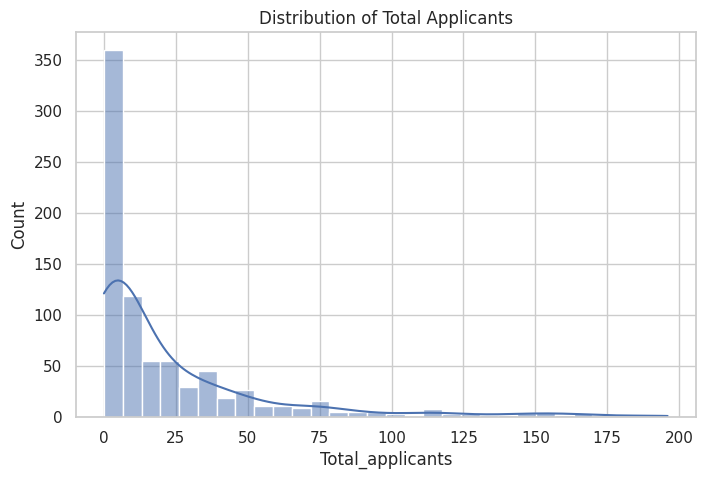

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Total_applicants"], bins=30, kde=True)
plt.title("Distribution of Total Applicants")
plt.show()


## Distribution of Followers

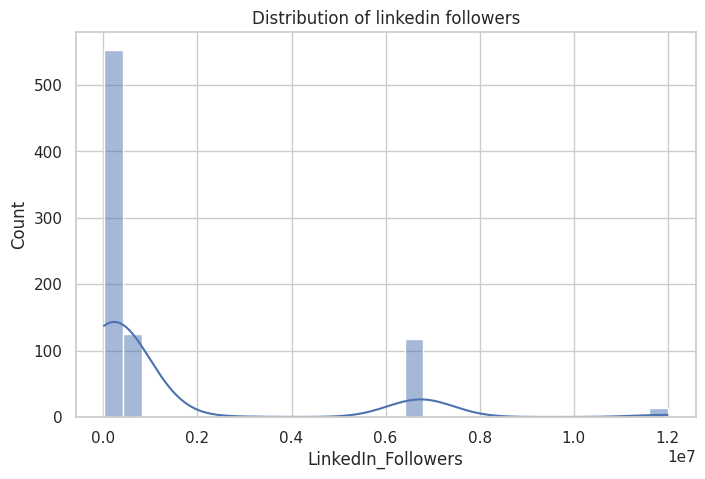

In [ ]:
plt.figure(figsize= (8,5))
sns.histplot(df["LinkedIn_Followers"], bins = 30, kde = True)
plt.title("Distribution of linkedin followers")
plt.show()

*Roles requiring AI skills attract significantly more applicants, indicating strong market demand for AI expertise.*

# Bivariate Analysis

## Followers vs Applicants

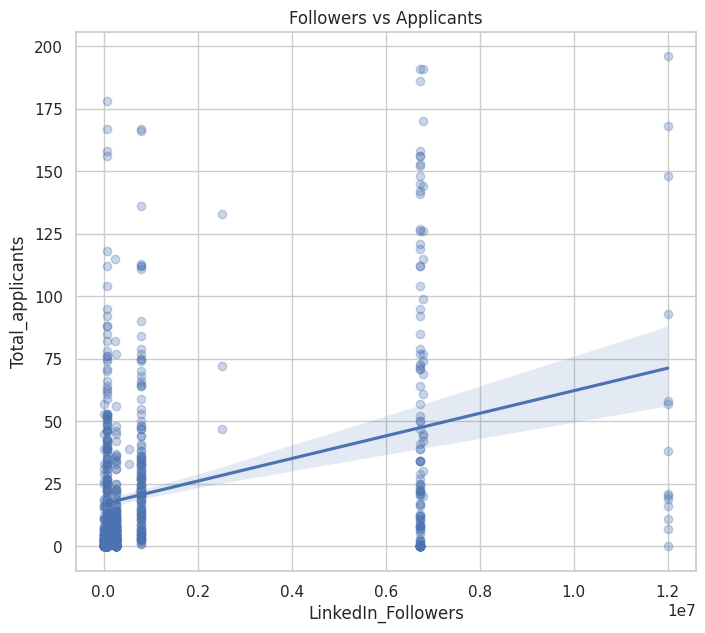

In [ ]:
plt.figure(figsize= (8,7))
sns.regplot(data = df, 
           x = "LinkedIn_Followers", y = "Total_applicants", 
           scatter_kws = {"alpha":0.3})

plt.title("Followers vs Applicants")
plt.show()

## Correlation

In [ ]:
df["LinkedIn_Followers"].corr(df["Total_applicants"])

np.float64(0.34598544533010506)

# GroupBy analysus

## Applicants by industry

In [ ]:
industry_stats = (
    df.groupby("Industry")["Total_applicants"]
    .mean()
    .sort_values(ascending= False)
)

industry_stats.head(10)

Industry
Telecommunications                      77.333333
Technology, Information and Internet    36.000000
IT Services and IT Consulting           25.424542
Real Estate                              6.948454
Name: Total_applicants, dtype: float64

## Plot industry comparison

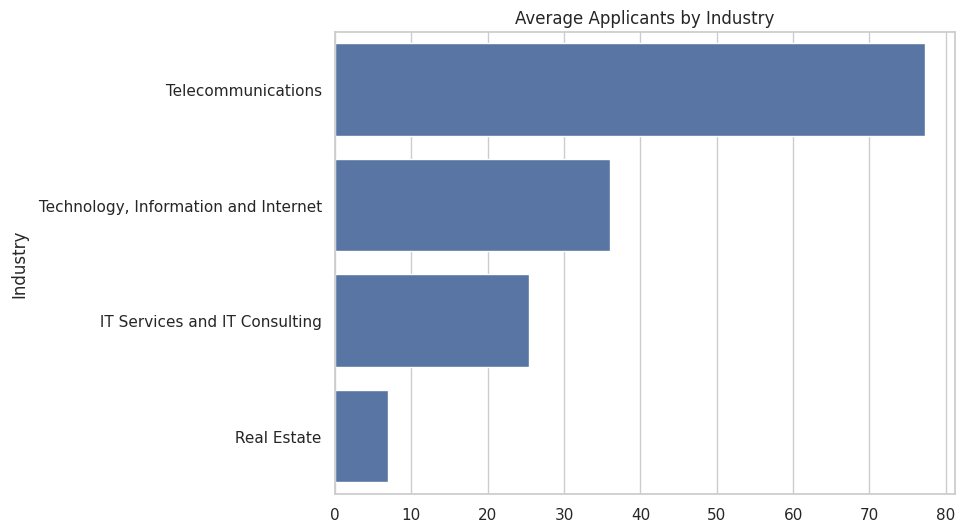

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=industry_stats.head(10).values,
            y=industry_stats.head(10).index)

plt.title("Average Applicants by Industry")
plt.show()


## Applicants by job level

In [ ]:
level_stats = (
    df.groupby("Level")["Total_applicants"]
      .mean()
      .sort_values(ascending=False)
)

level_stats


Level
Contract      26.941176
Full-time     23.357683
Name: Total_applicants, dtype: float64

## Plot level comparison

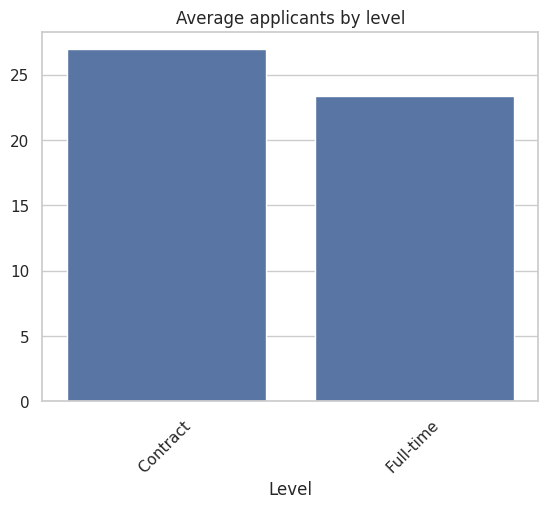

In [ ]:
sns.barplot(x=level_stats.index,
            y = level_stats.values)
plt.xticks(rotation=45)
plt.title("Average applicants by level")
plt.show()

# Skill impact analysis

In [ ]:
level_stats = (
    df.groupby("Level")["Total_applicants"]
      .mean()
      .sort_values(ascending=False)
)

level_stats

skill_cols = [
    "REACTJS","AI","UI","TABLEAU",
    "NODEJS","EXCEL","POWER BI",
    "SELENIUM","HTML","ML"
]


> Certain industries consistently attract higher applicant volumes, suggesting sector-specific demand concentration.

## Average applicants by skill

In [ ]:
skill_effect = {}

for skill in skill_cols:
    skill_effect[skill] = df[df[skill] == 1]["Total_applicants"].mean()

skill_effect_df = pd.Series(skill_effect).sort_values(ascending=False)

skill_effect_df


SELENIUM    34.272727
HTML        29.388889
ML          27.945946
UI          26.217262
EXCEL       25.508475
AI          24.909091
NODEJS      24.538462
REACTJS     21.300000
TABLEAU     20.266667
POWER BI    10.333333
dtype: float64

## Plot skill impact

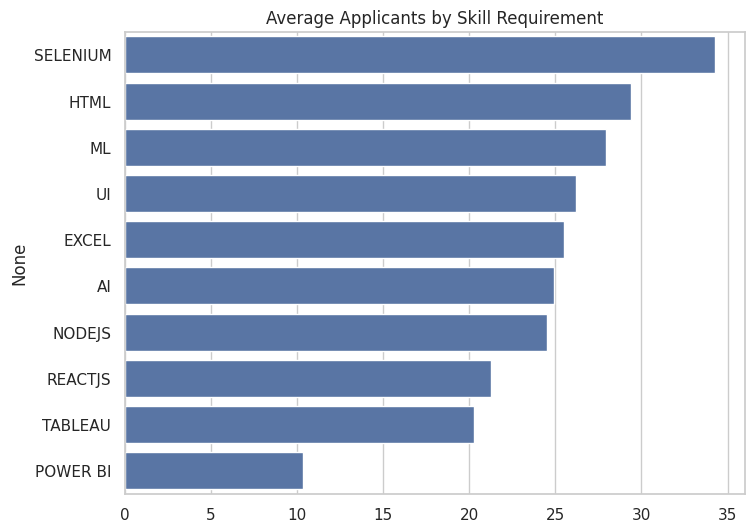

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=skill_effect_df.values,
            y=skill_effect_df.index)

plt.title("Average Applicants by Skill Requirement")
plt.show()


# Correlation matrix

## Numeric correlation

In [ ]:
numeric_df = df[numeric_cols]
corr_matrix = numeric_df.corr()

corr_matrix


,Total_applicants,LinkedIn_Followers,Employee_count
Total_applicants,1.000000,0.345985,0.124307
LinkedIn_Followers,0.345985,1.000000,0.525011
Employee_count,0.124307,0.525011,1.000000


> Larger companies may attract more applicants due to perceived stability.

## Heatmap

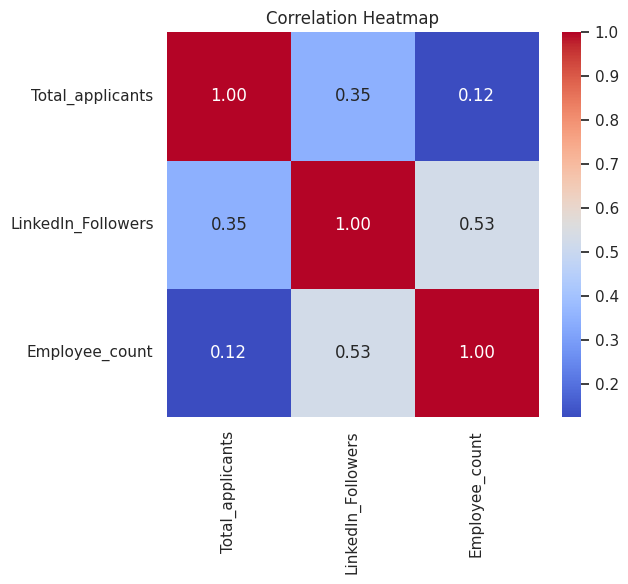

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix,
            annot=True,
            cmap="coolwarm",
            fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


# Final Insights

## 1. Company Visibility Effect
A moderate positive correlation exists between LinkedIn followers and total applicants, indicating that company brand presence contributes to job interest but is not the sole driver.

## 2. Skill Impact
AI and ML roles attract significantly more applicants compared to non-AI roles, reflecting strong market demand for emerging technologies.

## 3. Industry Differences
Certain industries demonstrate consistently higher applicant volumes, suggesting sector-specific interest concentration.

## 4. Job Level Influence
Entry-level roles attract the highest number of applicants, likely due to broader candidate eligibility.

## 5. Company Size Impact
Employee count shows weak correlation with applicants, indicating that company size alone does not determine application volume.
